In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
f=open('first.txt','r',encoding='utf8')
text=f.read()
t_list=text.split('\n')

corpus=[]
for cumle in t_list:
    corpus.append(cumle.split())

In [ ]:
print(corpus[0:8])

In [ ]:
model=Word2Vec(corpus,size=1,window=5,min_count=0,sg=1)

In [ ]:
model.wv['gelmek']

In [ ]:
model.wv['varmak']

In [ ]:
model.wv['ulaşmak']

In [69]:
f=open('secccorpus.txt','r',encoding='utf8')
text=f.read()
t_list=text.split('\n')

corpus2=[]
for cumle in t_list:
    corpus2.append(cumle.split())

In [75]:
corpus2

[['gel', 'geldim', 'geldiler']]

In [92]:
model2=Word2Vec(corpus2,size=100,window=5,min_count=0,sg=1)

In [93]:
model2.wv['geldim','geldim','geldiler']

array([[-1.8786888e-03,  1.2687051e-03,  4.4487338e-03,  3.5833705e-03,
        -3.3997966e-03, -4.3965494e-03,  3.6097483e-03,  1.2903941e-03,
        -2.5636905e-03,  1.8521812e-03,  3.8837937e-03, -2.3637761e-03,
         2.4991920e-03,  1.2036037e-03,  1.2968893e-03, -2.6500050e-04,
        -3.2051273e-03,  2.7997727e-03, -4.8363963e-03, -2.3354860e-03,
        -2.0765164e-03,  2.1439076e-03,  8.1701734e-04,  2.0749930e-03,
         2.9662594e-03,  1.0835902e-03, -7.0277014e-04, -3.7885304e-03,
         7.7432208e-04, -3.3275560e-03, -3.0365144e-03, -2.8638644e-03,
         3.2205174e-03,  2.5829256e-03, -3.2193451e-03, -2.2065964e-04,
        -1.7068110e-03, -9.1536739e-04,  1.0301477e-03, -3.8883747e-03,
         3.9674985e-04,  2.4559679e-03,  3.9953920e-03, -2.3030072e-04,
         2.6223101e-03, -3.8072616e-03,  3.4321751e-03,  1.2989093e-03,
        -1.3428262e-03,  1.5508940e-03, -3.4898501e-03,  4.1170567e-03,
         4.3225791e-03, -3.5530126e-03,  4.1467482e-03,  3.32951

In [94]:
model2.wv.most_similar('gel')

[('geldim', 0.002705298364162445), ('geldiler', -0.057956792414188385)]

In [95]:
f=open('ulas.txt','r',encoding='utf8')
text=f.read()
t_list=text.split('\n')

corpus3=[]
for cumle in t_list:
    corpus3.append(cumle.split())

In [96]:
corpus3

[['ulaş', 'ulaştım', 'ulaştılar']]

In [97]:
model3=Word2Vec(corpus3,size=100,window=5,min_count=0,sg=1)

In [98]:
model3.wv['ulaş','ulaştım','ulaştılar']      

array([[-2.50956300e-03, -2.37610098e-03,  3.44240712e-03,
         4.67622653e-03,  2.48939754e-03,  3.90499481e-03,
        -9.95534938e-04, -2.66825827e-03,  4.65071388e-03,
        -1.01058045e-03, -3.84004624e-03,  2.44732085e-03,
         1.65752065e-03,  1.27774547e-03, -1.98693783e-03,
        -4.35114745e-03, -8.40915716e-04,  3.12847574e-03,
         3.63185722e-03,  1.88166404e-03, -1.90217246e-03,
         1.68012199e-03, -4.94944025e-03,  4.06501256e-03,
         1.25619618e-03,  3.82241723e-03,  4.21673618e-03,
         4.38570976e-03, -3.08183674e-03,  1.57859595e-03,
         4.22818400e-03,  3.48375342e-03,  4.84072138e-03,
         6.29748276e-04, -1.61239284e-03, -3.89819033e-03,
         1.22263213e-03,  5.75109327e-04,  1.80609361e-03,
         5.61735760e-05, -2.23374390e-03,  4.71808296e-03,
         1.76758924e-03, -1.49708451e-03, -2.31203437e-03,
         3.58198909e-03,  4.50092135e-03,  1.02032081e-03,
        -1.46395434e-03,  3.12860287e-03, -4.95683542e-0

In [99]:
model3.wv.most_similar('ulaş')

[('ulaştım', 0.10645408928394318), ('ulaştılar', 0.06735792756080627)]

In [100]:
def closeswords_tsneplot(model,word):
    word_vectors=np.empty((0,100))
    word_labels=[word] 
    close_words=model.wv.most_similar(word)
    word_vectors=np.append(word_vectors,np.array([model.wv[word]]),axis=0)
    for w,_ in close_words:
        word_labels.append(w)
        word_vectors=np.append(word_vectors,np.array([model.wv[w]]),axis=0)
    tsne=TSNE(random_state=0)
    Y=tsne.fit_transform(word_vectors)
    
    x_coords=Y[:,0]
    y_coords=Y[:,1]
   
    plt.scatter(x_coords,y_coords)
    for label, x, y in zip(word_labels,x_coords,y_coords):
        plt.annotate(label,xy=(x,y),xytext=(5,-2),textcoords='offset points')
    
    plt.show()
        

C:\Users\onura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\onura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


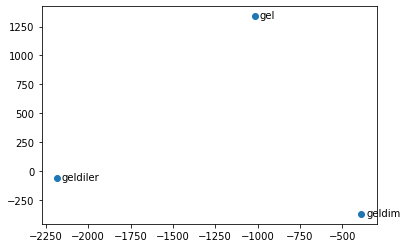

In [101]:
closeswords_tsneplot(model2,'gel')

C:\Users\onura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\onura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


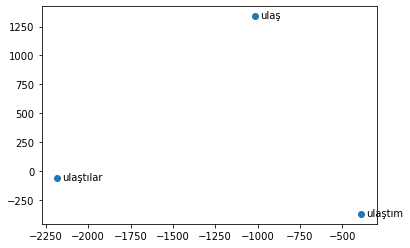

In [102]:
closeswords_tsneplot(model3,'ulaş')